## Your goal in this challenge is to find the factors that affect the life expectancy. Specifically, you need to find out which factors increase the expected life in the countries and which factors decrease it. 

In [34]:
# Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
from scipy.stats.mstats import winsorize

In [3]:
# Connection information
user = 'dsbc_student'
pw = '7*.8G9QH21'
host = '142.93.121.174'
port = '5432'
db = 'lifeexpectancy'

In [4]:
# Establish connection
connection = create_engine('postgresql://{}:{}@{}:{}/{}'.format(user, pw, host, port, db))

# Create df
life = pd.read_sql_query('select * from lifeexpectancy', con=connection)

# Terminate connection
connection.dispose()

In [5]:
# Column names
columns = ['COUNTRY', 'YEAR', 'STATUS', 'LIFE EXPECTANCY', 'ADULT MORTALITY', 'INFANT DEATHS', 'ALCOHOL',
          'PERCENT EXPENDITURE', 'HEPATITIS B', 'MEASLES', 'BMI', 'UNDER-FIVE DEATHS', 'POLIO', 'TOTAL EXPENDITURE',
          'DIPHTHERIA', 'HIV/AIDS', 'GDP', 'POPULATION', 'THINNESS 1-19', 'THINNESS 5-9', 'INCOME COMPOSITION OF RESOURCES',
          'SCHOOLING']

# Create df
life = pd.read_csv('../data/Life Expectancy Data.csv', names=columns, skiprows=1)

## Data Cleaning

In [6]:
life.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
COUNTRY                            2938 non-null object
YEAR                               2938 non-null int64
STATUS                             2938 non-null object
LIFE EXPECTANCY                    2928 non-null float64
ADULT MORTALITY                    2928 non-null float64
INFANT DEATHS                      2938 non-null int64
ALCOHOL                            2744 non-null float64
PERCENT EXPENDITURE                2938 non-null float64
HEPATITIS B                        2385 non-null float64
MEASLES                            2938 non-null int64
BMI                                2904 non-null float64
UNDER-FIVE DEATHS                  2938 non-null int64
POLIO                              2919 non-null float64
TOTAL EXPENDITURE                  2712 non-null float64
DIPHTHERIA                         2919 non-null float64
HIV/AIDS                           2938 non-null

In [7]:
life.head()

,COUNTRY,YEAR,STATUS,LIFE EXPECTANCY,ADULT MORTALITY,INFANT DEATHS,ALCOHOL,PERCENT EXPENDITURE,HEPATITIS B,MEASLES,...,POLIO,TOTAL EXPENDITURE,DIPHTHERIA,HIV/AIDS,GDP,POPULATION,THINNESS 1-19,THINNESS 5-9,INCOME COMPOSITION OF RESOURCES,SCHOOLING
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [8]:
life.describe()

,YEAR,LIFE EXPECTANCY,ADULT MORTALITY,INFANT DEATHS,ALCOHOL,PERCENT EXPENDITURE,HEPATITIS B,MEASLES,BMI,UNDER-FIVE DEATHS,POLIO,TOTAL EXPENDITURE,DIPHTHERIA,HIV/AIDS,GDP,POPULATION,THINNESS 1-19,THINNESS 5-9,INCOME COMPOSITION OF RESOURCES,SCHOOLING
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


### Missing Values 

In [9]:
# Review unique values in columns to see if any abnormal / null values
for column in columns:
    print('------------------------------------\n',
          'Unique values for {} \n'.format(column),
          '-----------------------------------\n',
          life[column].unique())

------------------------------------
 Unique values for COUNTRY 
 -----------------------------------
 ['Afghanistan' 'Albania' 'Algeria' 'Angola' 'Antigua and Barbuda'
 'Argentina' 'Armenia' 'Australia' 'Austria' 'Azerbaijan' 'Bahamas'
 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus' 'Belgium' 'Belize' 'Benin'
 'Bhutan' 'Bolivia (Plurinational State of)' 'Bosnia and Herzegovina'
 'Botswana' 'Brazil' 'Brunei Darussalam' 'Bulgaria' 'Burkina Faso'
 'Burundi' "Côte d'Ivoire" 'Cabo Verde' 'Cambodia' 'Cameroon' 'Canada'
 'Central African Republic' 'Chad' 'Chile' 'China' 'Colombia' 'Comoros'
 'Congo' 'Cook Islands' 'Costa Rica' 'Croatia' 'Cuba' 'Cyprus' 'Czechia'
 "Democratic People's Republic of Korea"
 'Democratic Republic of the Congo' 'Denmark' 'Djibouti' 'Dominica'
 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador' 'Equatorial Guinea'
 'Eritrea' 'Estonia' 'Ethiopia' 'Fiji' 'Finland' 'France' 'Gabon' 'Gambia'
 'Georgia' 'Germany' 'Ghana' 'Greece' 'Grenada' 'Guatemala' 'Guinea'
 'Guinea-Bi

When it comes to handling missing values in a dataset, it seems there are two primary approaches:

1. Remove the row(s) completely
2. Fill in missing values with unharmful values

Since we're not dealing with tens of thousands of records, I decided to populate the missing values with unharmful values. I thought about using interpolation, but since this is not a time-series dataset I decided to use the mean and median statistics which are both measures of central tendency.

In [10]:
# Split variables with null into two lists
is_null_fill_median = []
is_null_fill_mean = []

for column in columns:
    if life[column].isnull().sum() > 0 and life[column].isnull().sum() <= 50:
        is_null_fill_median.append(column)
    elif life[column].isnull().sum() > 51:
        is_null_fill_mean.append(column)

In [11]:
# Fill in null values with median statistic
for column in is_null_fill_median:
    life[column].fillna(life[column].median(), inplace=True)
    
# Fill in null values with mean statistic
for column in is_null_fill_mean:
    life[column].fillna(life[column].mean(), inplace=True)

In [12]:
# Review .info method to see if any null values exist
life.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
COUNTRY                            2938 non-null object
YEAR                               2938 non-null int64
STATUS                             2938 non-null object
LIFE EXPECTANCY                    2938 non-null float64
ADULT MORTALITY                    2938 non-null float64
INFANT DEATHS                      2938 non-null int64
ALCOHOL                            2938 non-null float64
PERCENT EXPENDITURE                2938 non-null float64
HEPATITIS B                        2938 non-null float64
MEASLES                            2938 non-null int64
BMI                                2938 non-null float64
UNDER-FIVE DEATHS                  2938 non-null int64
POLIO                              2938 non-null float64
TOTAL EXPENDITURE                  2938 non-null float64
DIPHTHERIA                         2938 non-null float64
HIV/AIDS                           2938 non-null

In reviewing the results of ```life.info()```, we see there are no null values.

### Outlier Detection 

Some machine learning models are sensitive to extreme values. These outliers skew the descriptive statistics of the data and need to be removed.

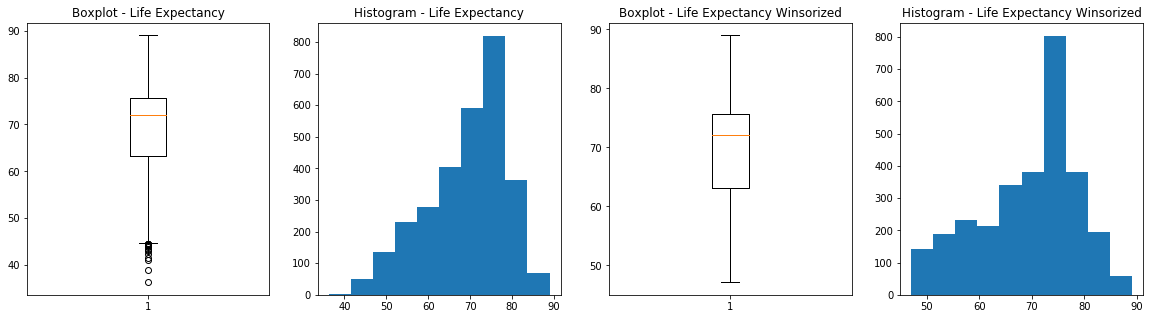

In [37]:
# Life expectancy winsorized
life_exp_winsorized = winsorize(life['LIFE EXPECTANCY'], (0.02, 0))

plt.figure(figsize=(20, 5))

plt.subplot(1, 4, 1)
plt.boxplot(life['LIFE EXPECTANCY'])
plt.title('Boxplot - Life Expectancy')

plt.subplot(1, 4, 2)
plt.hist(life['LIFE EXPECTANCY'])
plt.title('Histogram - Life Expectancy')

plt.subplot(1, 4, 3)
plt.boxplot(life_exp_winsorized)
plt.title('Boxplot - Life Expectancy Winsorized')

plt.subplot(1, 4, 4)
plt.hist(life_exp_winsorized)
plt.title('Histogram - Life Expectancy Winsorized')

plt.show()

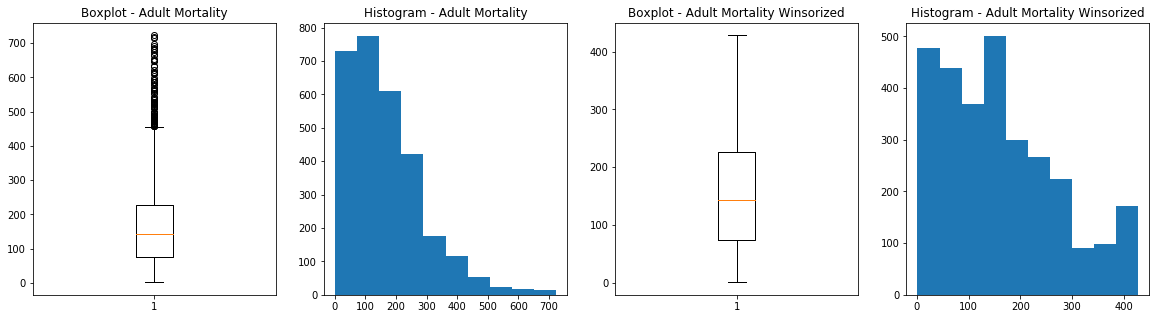

In [40]:
# Adult mortality winsorized
adult_mort_winsorized = winsorize(life['ADULT MORTALITY'], (0, 0.04))

plt.figure(figsize=(20, 5))

plt.subplot(1, 4, 1)
plt.boxplot(life['ADULT MORTALITY'])
plt.title('Boxplot - Adult Mortality')

plt.subplot(1, 4, 2)
plt.hist(life['ADULT MORTALITY'])
plt.title('Histogram - Adult Mortality')

plt.subplot(1, 4, 3)
plt.boxplot(adult_mort_winsorized)
plt.title('Boxplot - Adult Mortality Winsorized')

plt.subplot(1, 4, 4)
plt.hist(adult_mort_winsorized)
plt.title('Histogram - Adult Mortality Winsorized')

plt.show()

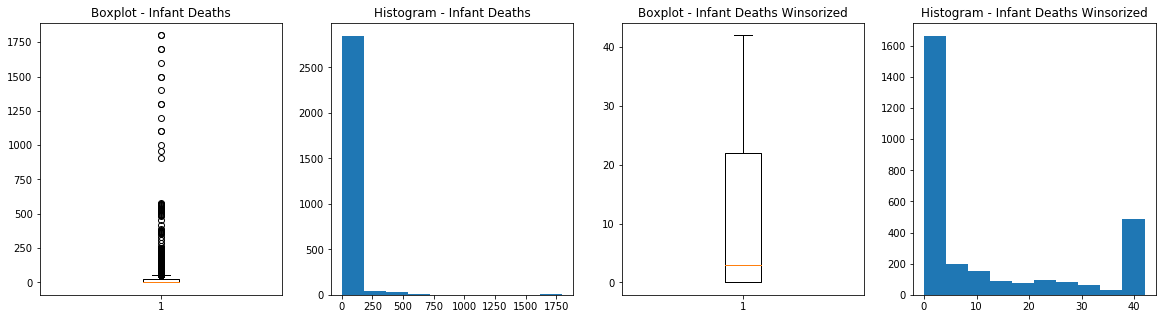

In [42]:
# Infant deaths winsorized
infant_deaths_winsorized = winsorize(life['INFANT DEATHS'], (0, 0.15))

plt.figure(figsize=(20, 5))

plt.subplot(1, 4, 1)
plt.boxplot(life['INFANT DEATHS'])
plt.title('Boxplot - Infant Deaths')

plt.subplot(1, 4, 2)
plt.hist(life['INFANT DEATHS'])
plt.title('Histogram - Infant Deaths')

plt.subplot(1, 4, 3)
plt.boxplot(infant_deaths_winsorized)
plt.title('Boxplot - Infant Deaths Winsorized')

plt.subplot(1, 4, 4)
plt.hist(infant_deaths_winsorized)
plt.title('Histogram - Infant Deaths Winsorized')

plt.show()

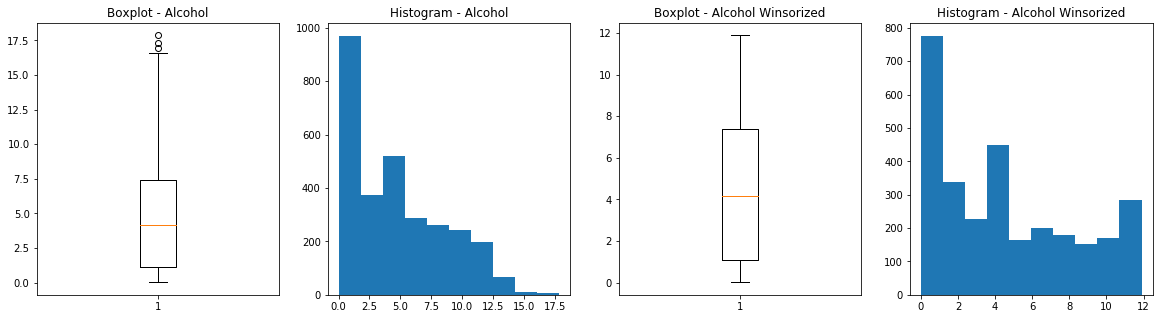

In [43]:
# Alcohol winsorized
alcohol_winsorized = winsorize(life['ALCOHOL'], (0, 0.05))

plt.figure(figsize=(20, 5))

plt.subplot(1, 4, 1)
plt.boxplot(life['ALCOHOL'])
plt.title('Boxplot - Alcohol')

plt.subplot(1, 4, 2)
plt.hist(life['ALCOHOL'])
plt.title('Histogram - Alcohol')

plt.subplot(1, 4, 3)
plt.boxplot(alcohol_winsorized)
plt.title('Boxplot - Alcohol Winsorized')

plt.subplot(1, 4, 4)
plt.hist(alcohol_winsorized)
plt.title('Histogram - Alcohol Winsorized')

plt.show()

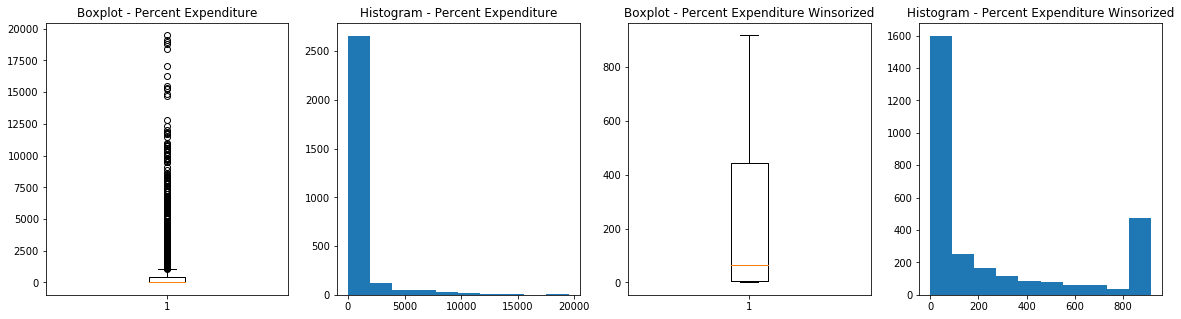

In [51]:
# Percent expenditure winsorized
percent_exp_winsorized = winsorize(life['PERCENT EXPENDITURE'], (0, 0.15))

plt.figure(figsize=(20, 5))

plt.subplot(1, 4, 1)
plt.boxplot(life['PERCENT EXPENDITURE'])
plt.title('Boxplot - Percent Expenditure')

plt.subplot(1, 4, 2)
plt.hist(life['PERCENT EXPENDITURE'])
plt.title('Histogram - Percent Expenditure')

plt.subplot(1, 4, 3)
plt.boxplot(percent_exp_winsorized)
plt.title('Boxplot - Percent Expenditure Winsorized')

plt.subplot(1, 4, 4)
plt.hist(percent_exp_winsorized)
plt.title('Histogram - Percent Expenditure Winsorized')

plt.show()

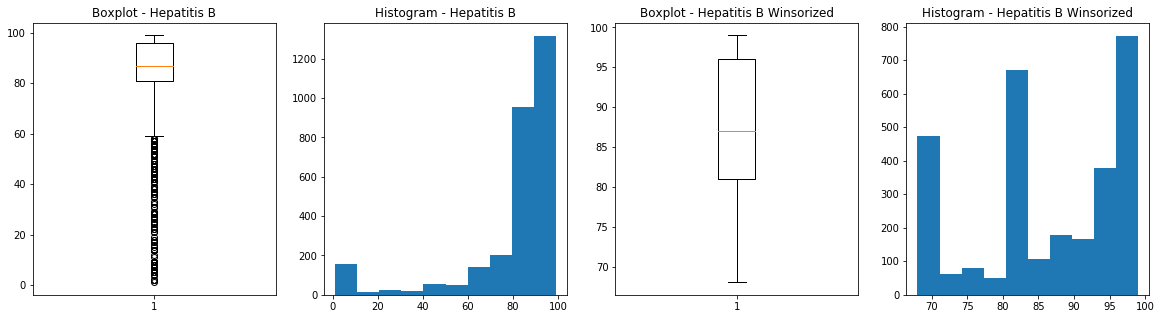

In [53]:
# Hepatitis B winsorized
hep_winsorized = winsorize(life['HEPATITIS B'], (0.15, 0))

plt.figure(figsize=(20, 5))

plt.subplot(1, 4, 1)
plt.boxplot(life['HEPATITIS B'])
plt.title('Boxplot - Hepatitis B')

plt.subplot(1, 4, 2)
plt.hist(life['HEPATITIS B'])
plt.title('Histogram - Hepatitis B')

plt.subplot(1, 4, 3)
plt.boxplot(hep_winsorized)
plt.title('Boxplot - Hepatitis B Winsorized')

plt.subplot(1, 4, 4)
plt.hist(hep_winsorized)
plt.title('Histogram - Hepatitis B Winsorized')

plt.show()

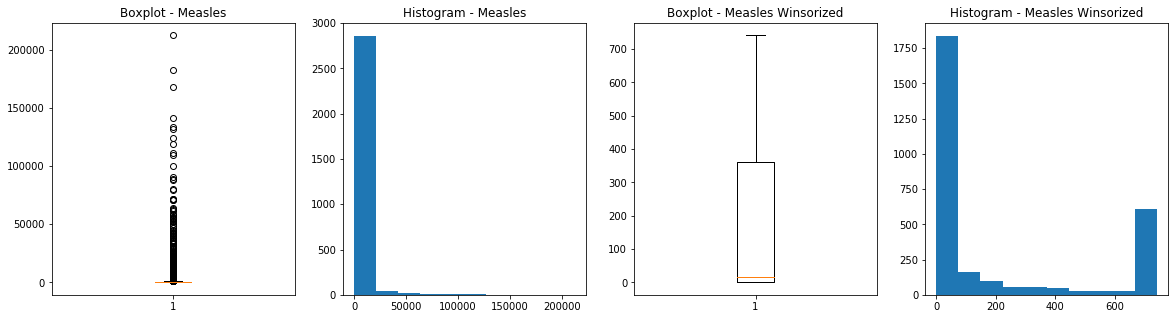

In [57]:
# Measles winsorized
measles_winsorized = winsorize(life['MEASLES'], (0, 0.20))

plt.figure(figsize=(20, 5))

plt.subplot(1, 4, 1)
plt.boxplot(life['MEASLES'])
plt.title('Boxplot - Measles')

plt.subplot(1, 4, 2)
plt.hist(life['MEASLES'])
plt.title('Histogram - Measles')

plt.subplot(1, 4, 3)
plt.boxplot(measles_winsorized)
plt.title('Boxplot - Measles Winsorized')

plt.subplot(1, 4, 4)
plt.hist(measles_winsorized)
plt.title('Histogram - Measles Winsorized')

plt.show()

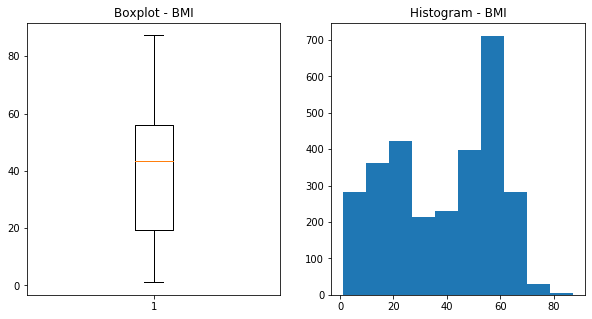

In [22]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.boxplot(life['BMI'])
plt.title('Boxplot - BMI')

plt.subplot(1, 2, 2)
plt.hist(life['BMI'])
plt.title('Histogram - BMI')

plt.show()

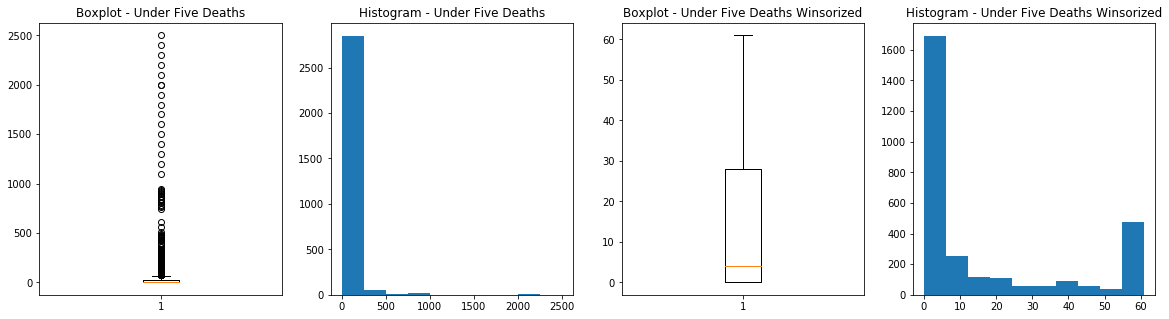

In [59]:
# Under-five deaths winsorized
under_five_winsorized = winsorize(life['UNDER-FIVE DEATHS'], (0, 0.15))

plt.figure(figsize=(20, 5))

plt.subplot(1, 4, 1)
plt.boxplot(life['UNDER-FIVE DEATHS'])
plt.title('Boxplot - Under Five Deaths')

plt.subplot(1, 4, 2)
plt.hist(life['UNDER-FIVE DEATHS'])
plt.title('Histogram - Under Five Deaths')

plt.subplot(1, 4, 3)
plt.boxplot(under_five_winsorized)
plt.title('Boxplot - Under Five Deaths Winsorized')

plt.subplot(1, 4, 4)
plt.hist(under_five_winsorized)
plt.title('Histogram - Under Five Deaths Winsorized')

plt.show()

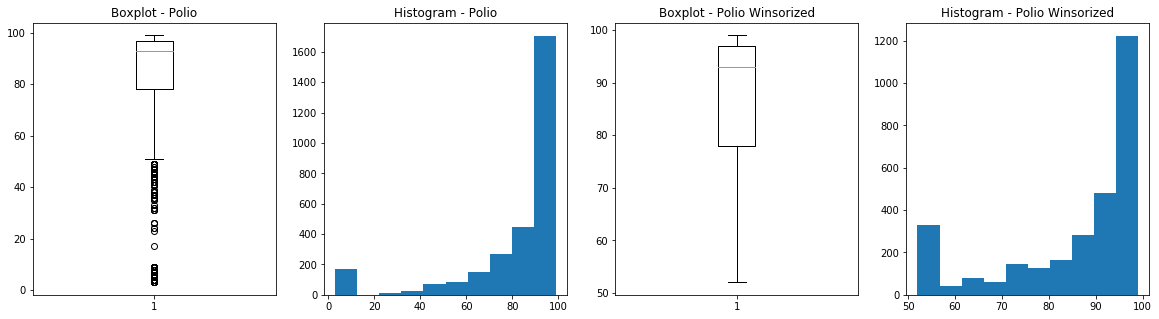

In [60]:
# Polio winsorized
polio_winsorized = winsorize(life['POLIO'], (0.10, 0))

plt.figure(figsize=(20, 5))

plt.subplot(1, 4, 1)
plt.boxplot(life['POLIO'])
plt.title('Boxplot - Polio')

plt.subplot(1, 4, 2)
plt.hist(life['POLIO'])
plt.title('Histogram - Polio')

plt.subplot(1, 4, 3)
plt.boxplot(polio_winsorized)
plt.title('Boxplot - Polio Winsorized')

plt.subplot(1, 4, 4)
plt.hist(polio_winsorized)
plt.title('Histogram - Polio Winsorized')

plt.show()

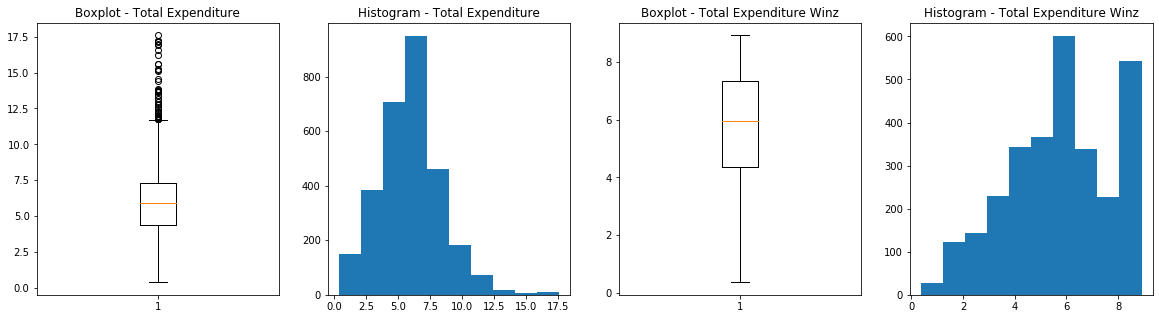

In [61]:
# Total Expenditure winsorized
total_exp_winsorized = winsorize(life['TOTAL EXPENDITURE'], (0, 0.10))

plt.figure(figsize=(20, 5))

plt.subplot(1, 4, 1)
plt.boxplot(life['TOTAL EXPENDITURE'])
plt.title('Boxplot - Total Expenditure')

plt.subplot(1, 4, 2)
plt.hist(life['TOTAL EXPENDITURE'])
plt.title('Histogram - Total Expenditure')

plt.subplot(1, 4, 3)
plt.boxplot(total_exp_winsorized)
plt.title('Boxplot - Total Expenditure Winz')

plt.subplot(1, 4, 4)
plt.hist(total_exp_winsorized)
plt.title('Histogram - Total Expenditure Winz')

plt.show()

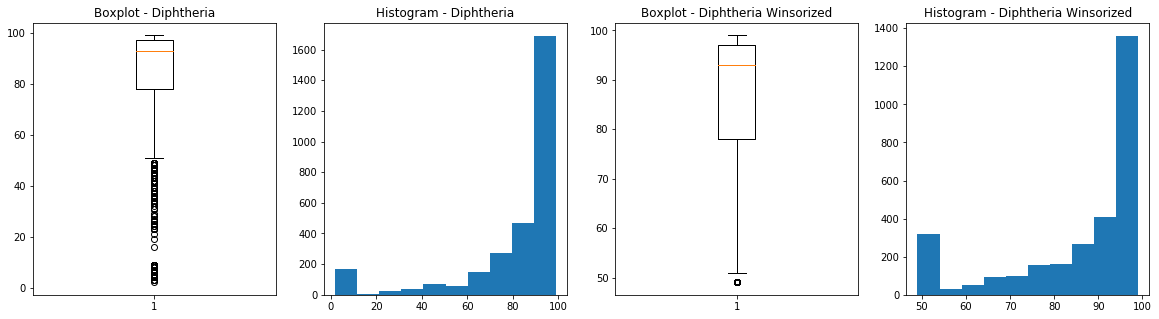

In [62]:
# Diphtheria winsorized
dip_winsorized = winsorize(life['DIPHTHERIA'], (0.10, 0))

plt.figure(figsize=(20, 5))

plt.subplot(1, 4, 1)
plt.boxplot(life['DIPHTHERIA'])
plt.title('Boxplot - Diphtheria')

plt.subplot(1, 4, 2)
plt.hist(life['DIPHTHERIA'])
plt.title('Histogram - Diphtheria')

plt.subplot(1, 4, 3)
plt.boxplot(dip_winsorized)
plt.title('Boxplot - Diphtheria Winsorized')

plt.subplot(1, 4, 4)
plt.hist(dip_winsorized)
plt.title('Histogram - Diphtheria Winsorized')

plt.show()

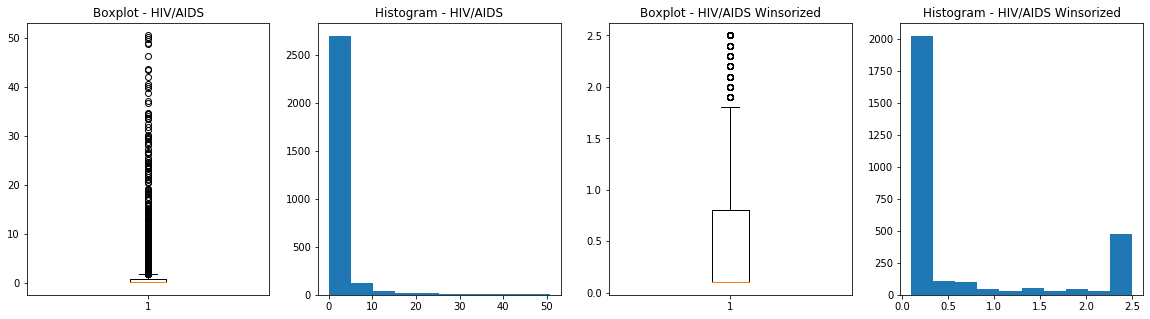

In [64]:
# HIV winsorized
hiv_winsorized = winsorize(life['HIV/AIDS'], (0, 0.15))

plt.figure(figsize=(20, 5))

plt.subplot(1, 4, 1)
plt.boxplot(life['HIV/AIDS'])
plt.title('Boxplot - HIV/AIDS')

plt.subplot(1, 4, 2)
plt.hist(life['HIV/AIDS'])
plt.title('Histogram - HIV/AIDS')

plt.subplot(1, 4, 3)
plt.boxplot(hiv_winsorized)
plt.title('Boxplot - HIV/AIDS Winsorized')

plt.subplot(1, 4, 4)
plt.hist(hiv_winsorized)
plt.title('Histogram - HIV/AIDS Winsorized')

plt.show()

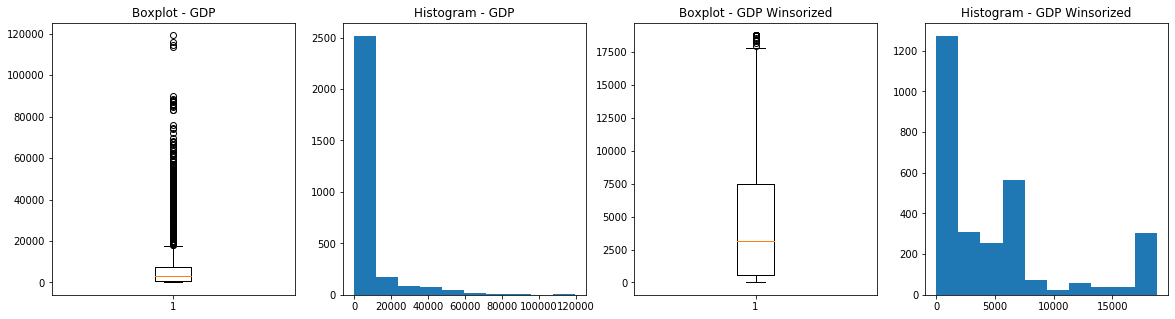

In [65]:
# GDP winsorized
gdp_winsorized = winsorize(life['GDP'], (0, 0.10))

plt.figure(figsize=(20, 5))

plt.subplot(1, 4, 1)
plt.boxplot(life['GDP'])
plt.title('Boxplot - GDP')

plt.subplot(1, 4, 2)
plt.hist(life['GDP'])
plt.title('Histogram - GDP')

plt.subplot(1, 4, 3)
plt.boxplot(gdp_winsorized)
plt.title('Boxplot - GDP Winsorized')

plt.subplot(1, 4, 4)
plt.hist(gdp_winsorized)
plt.title('Histogram - GDP Winsorized')

plt.show()

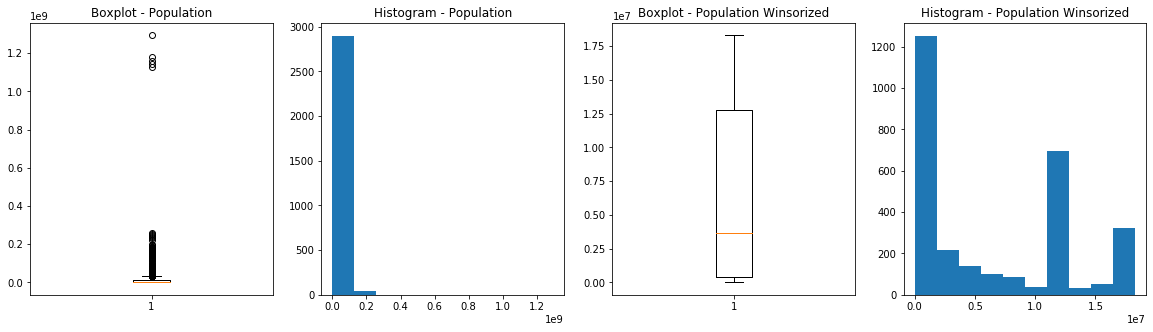

In [66]:
# Population winsorized
pop_winsorized = winsorize(life['POPULATION'], (0, 0.10))

plt.figure(figsize=(20, 5))

plt.subplot(1, 4, 1)
plt.boxplot(life['POPULATION'])
plt.title('Boxplot - Population')

plt.subplot(1, 4, 2)
plt.hist(life['POPULATION'])
plt.title('Histogram - Population')

plt.subplot(1, 4, 3)
plt.boxplot(pop_winsorized)
plt.title('Boxplot - Population Winsorized')

plt.subplot(1, 4, 4)
plt.hist(pop_winsorized)
plt.title('Histogram - Population Winsorized')

plt.show()

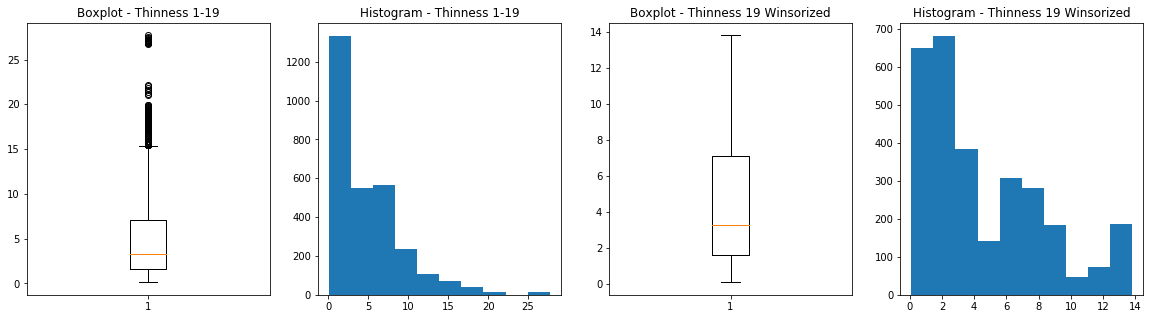

In [67]:
# Thinness 1-19 winsorized
thin_19_winsorized = winsorize(life['THINNESS 1-19'], (0, 0.05))

plt.figure(figsize=(20, 5))

plt.subplot(1, 4, 1)
plt.boxplot(life['THINNESS 1-19'])
plt.title('Boxplot - Thinness 1-19')

plt.subplot(1, 4, 2)
plt.hist(life['THINNESS 1-19'])
plt.title('Histogram - Thinness 1-19')

plt.subplot(1, 4, 3)
plt.boxplot(thin_19_winsorized)
plt.title('Boxplot - Thinness 19 Winsorized')

plt.subplot(1, 4, 4)
plt.hist(thin_19_winsorized)
plt.title('Histogram - Thinness 19 Winsorized')

plt.show()

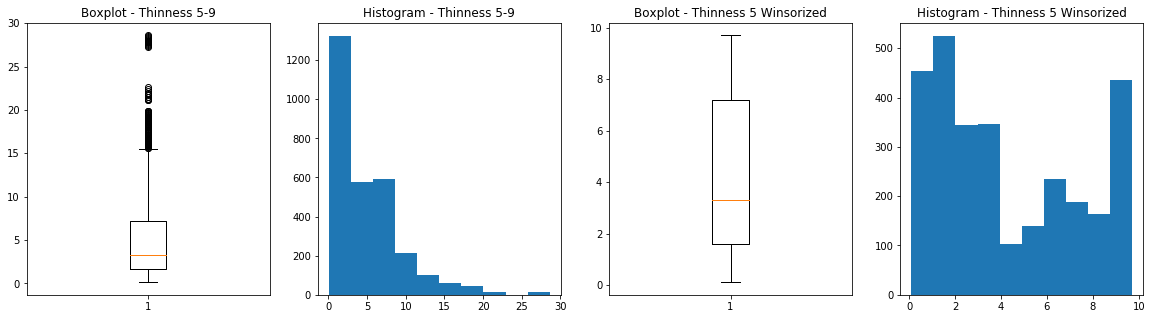

In [68]:
# Thinness 5 winsorized
thin_5_winsorized = winsorize(life['THINNESS 5-9'], (0, 0.10))

plt.figure(figsize=(20, 5))

plt.subplot(1, 4, 1)
plt.boxplot(life['THINNESS 5-9'])
plt.title('Boxplot - Thinness 5-9')

plt.subplot(1, 4, 2)
plt.hist(life['THINNESS 5-9'])
plt.title('Histogram - Thinness 5-9')

plt.subplot(1, 4, 3)
plt.boxplot(thin_5_winsorized)
plt.title('Boxplot - Thinness 5 Winsorized')

plt.subplot(1, 4, 4)
plt.hist(thin_5_winsorized)
plt.title('Histogram - Thinness 5 Winsorized')

plt.show()

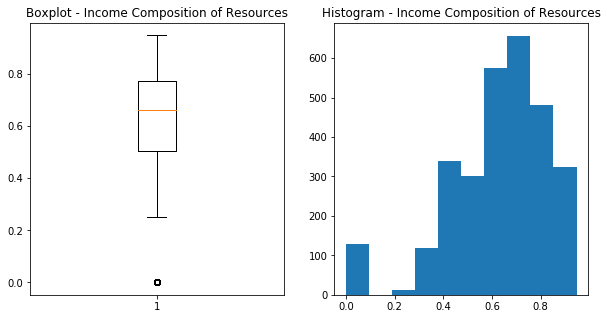

In [33]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.boxplot(life['INCOME COMPOSITION OF RESOURCES'])
plt.title('Boxplot - Income Composition of Resources')

plt.subplot(1, 2, 2)
plt.hist(life['INCOME COMPOSITION OF RESOURCES'])
plt.title('Histogram - Income Composition of Resources')

plt.show()

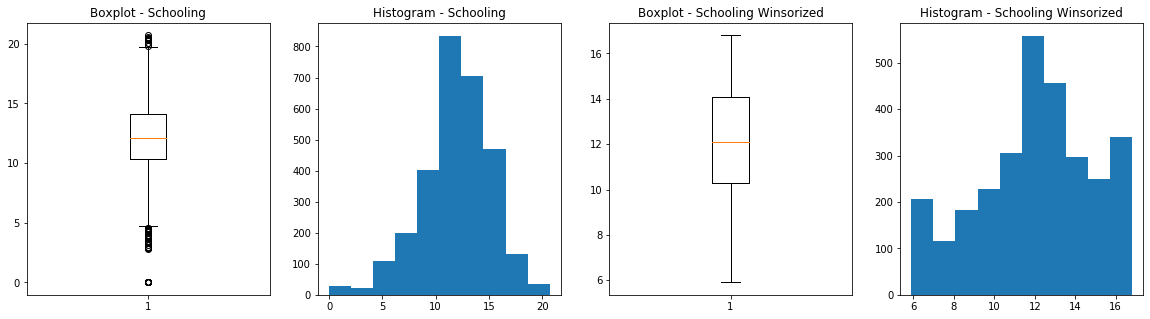

In [69]:
# Schooling winsorized
school_winsorized = winsorize(life['SCHOOLING'], (0.05, 0.05))

plt.figure(figsize=(20, 5))

plt.subplot(1, 4, 1)
plt.boxplot(life['SCHOOLING'])                          
plt.title('Boxplot - Schooling')

plt.subplot(1, 4, 2)
plt.hist(life['SCHOOLING'])
plt.title('Histogram - Schooling')

plt.subplot(1, 4, 3)
plt.boxplot(school_winsorized)
plt.title('Boxplot - Schooling Winsorized')

plt.subplot(1, 4, 4)
plt.hist(school_winsorized)
plt.title('Histogram - Schooling Winsorized')

plt.show()